# Evidence of Discrimination?

The Department of Developmental Services (DDS) in California is responsible for allocating funds to support over 250,000 developmentally-disabled residents. The data set `ca_dds_expenditures.csv` contains data about 1,000 of these residents. The data comes from a discrimination lawsuit which alleged that California's Department of Developmental Services (DDS) privileged white (non-Hispanic) residents over Hispanic residents in allocating funds. We will focus on comparing the allocation of funds (i.e., expenditures) for these two ethnicities only, although there are other ethnicities in this data set.

There are 6 variables in this data set:

- Id:  5-digit, unique identification code for each consumer (similar to a social security number and used for identification purposes)  
- Age Cohort:  Binned age variable represented as six age cohorts (0-5, 6-12, 13-17, 18-21, 22-50, and 51+)
- Age:  Unbinned age variable
- Gender:  Male or Female
- Expenditures:  Dollar amount of annual expenditures spent on each consumer
- Ethnicity:  Eight ethnic groups (American Indian, Asian, Black, Hispanic, Multi-race, Native Hawaiian, Other, and White non-Hispanic)

# Question 1

Read in the data set. Make a graphic that compares the _average_ expenditures by the DDS on Hispanic residents and white (non-Hispanic) residents. Comment on what you see.

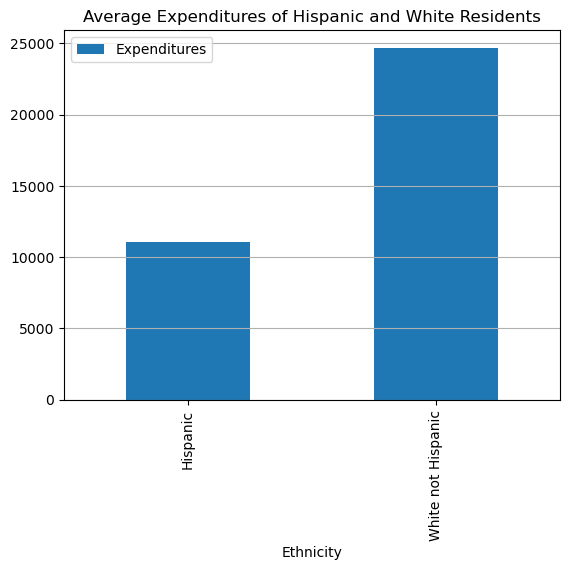

In [3]:
# YOUR CODE HERE
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("ca_dds_expenditures.csv")
table = pd.pivot_table(data = df , values = 'Expenditures' , index = 'Ethnicity' , aggfunc = 'mean' )
table.loc [ [ 'Hispanic' , 'White not Hispanic' ] ].plot( kind = 'bar' )
plt.title('Average Expenditures of Hispanic and White Residents')
plt.grid(axis = "y")

**YOUR EXPLANATION HERE**

The graphic displays Hispanic individuals having a lower amount of expenditures around 10,000 and White not Hispanic having nearly 2.5x more near 25,000. This suggests that Hispanic developmentally-disabled residents in California have a less expenditures that White not Hispanic individuals.

# Question 2

Now, calculate the average expenditures by ethnicity and age cohort. Make a graphic that compares the average expenditure on Hispanic residents and white (non-Hispanic) residents, _within each age cohort_. 

Comment on what you see. How do these results appear to contradict the results you obtained in Question 1?

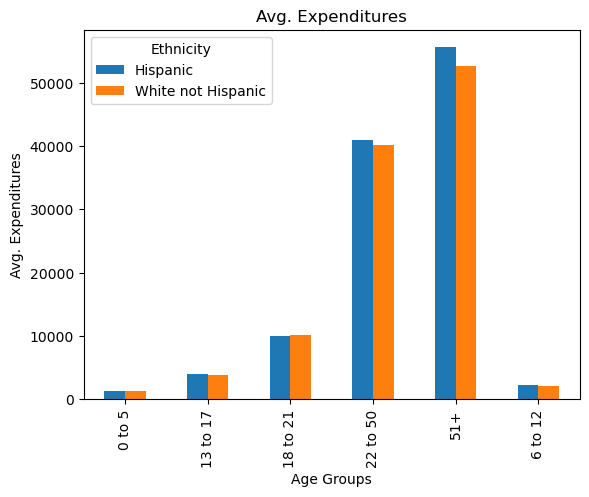

In [6]:
avg_expend = df.groupby(['Age Cohort', 'Ethnicity'])['Expenditures'].mean().unstack()

white_and_hisp = avg_expend[['Hispanic', "White not Hispanic"]]

white_and_hisp.plot(kind='bar')
plt.title("Avg. Expenditures")
plt.xlabel("Age Groups")
plt.ylabel("Avg. Expenditures")
plt.legend(title="Ethnicity")


**YOUR EXPLANATION HERE**

The chart shows that in each given age group both Hispanic and White not Hispanics have about the same expenditures. This suggests that the sample may have favored having older individuals in the White not Hispanic category, while the Hispanic category may have younger individuals which resulted in the disparity.

The previous graph shows that Hispanic individuals have less expenditures on average which is not consistent with what we see in this graph.

# Question 3

Can you explain the discrepancy between the two analyses you conducted above (i.e., Questions 1 and 2)? Try to tell a complete story that interweaves tables, graphics, and explanation.

_Hint:_ You might want to consider looking at:

- the distributions of ages of Hispanics and whites
- the average expenditure as a function of age

<Axes: xlabel='Age Cohort'>

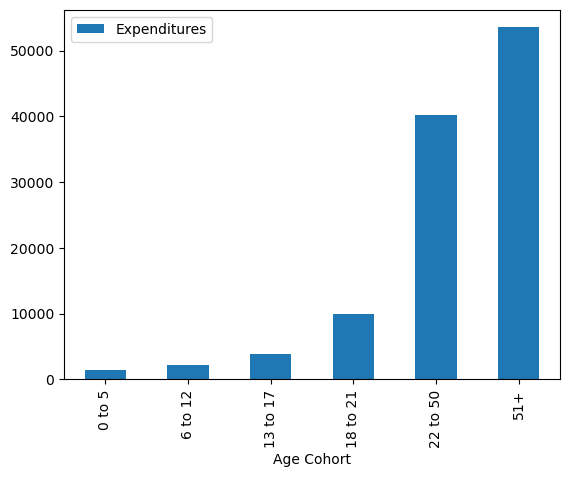

In [9]:
# YOUR CODE HERE (although you may want to add more code cells)

table = pd.pivot_table(data = df, values = 'Expenditures', index = ['Age Cohort'], aggfunc = 'mean')
table.loc[['0 to 5', "6 to 12",	"13 to 17", "18 to 21", "22 to 50", "51+"]].plot(kind = 'bar')

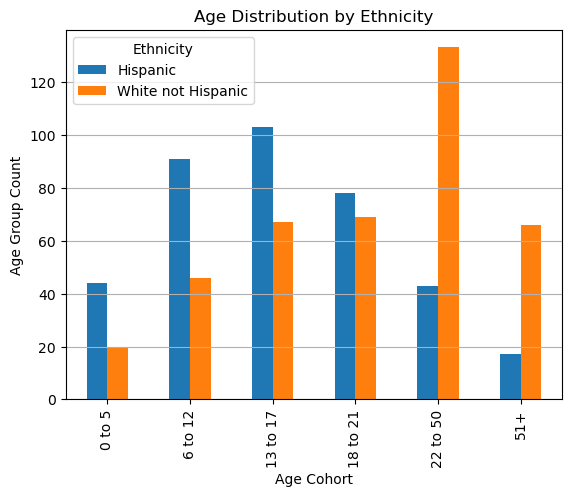

In [10]:
ages = ['0 to 5', '6 to 12', '13 to 17', '18 to 21', '22 to 50', '51+']

df['Age Cohort'] = pd.Categorical(df['Age Cohort'], categories=ages, ordered=True)

ethn_age_counts = pd.pivot_table( 
    data=df[df['Ethnicity'].isin(['Hispanic', 'White not Hispanic'])],
    values='Expenditures',
    index='Age Cohort',
    columns='Ethnicity',
    aggfunc='count',
    observed=False)

ethn_age_counts.plot(kind = "bar")
plt.title("Age Distribution by Ethnicity")
plt.ylabel("Age Group Count")
plt.grid(axis = 'y')



**YOUR EXPLANATION HERE (although you may want to add more markdown cells)**

These two graphs display the distribution of expenditures across each age cohort, and the count of each age group across the ethnicities.

The results show that there is a increasing amount of expenditures in our samples as the age group increases. In the second graph we see that Hispanic populations have a higher frequency of younder individuals while White not Hispanichas a higher frequency of older individuals. This suggests that age category within the sample is effecting the the difference in expenditures by ethnicity.